In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
fraud=pd.read_csv("C:\Excelr\Fraud_check.csv")

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.shape

(600, 6)

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# EDA and Transformation# 

In [6]:
fraud1=fraud.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Exp'},axis=1)

In [7]:
fraud1

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
fraud1.drop_duplicates()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [9]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
fraud1['Undergrad']=lb.fit_transform(fraud1['Undergrad'])
fraud1['Urban']=lb.fit_transform(fraud1['Urban'])
fraud1['Marital_Status']=lb.fit_transform(fraud1['Marital_Status'])
fraud1['Taxable_Income'] = fraud1.Taxable_Income.map(lambda x:1 if x<=30000 else 0)

In [10]:
fraud1

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Exp,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [11]:
first_column = fraud1.pop('Taxable_Income')
fraud1.insert(0, 'Taxable_Income', first_column)

In [12]:
array=fraud1.values
X=array[:,1:6]
Y=array[:,0]

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [14]:
X_train.shape,X_test.shape

((420, 5), (180, 5))

 # Building Decision Tree Classifier using Entropy Criteria

In [15]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    178
1      2
dtype: int64

In [17]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [18]:
pd.crosstab(Y_test,preds)

col_0,0,1
row_0,,
0,139,2
1,39,0


In [19]:
np.mean(preds==Y_test)

0.7722222222222223

In [20]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87       178
           1       0.00      0.00      0.00         2

    accuracy                           0.77       180
   macro avg       0.49      0.39      0.44       180
weighted avg       0.97      0.77      0.86       180



# # Building Decision Tree Classifier (CART) using Gini Criteria

In [21]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
pred=model.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [23]:
np.mean(preds==Y_test)

0.7722222222222223

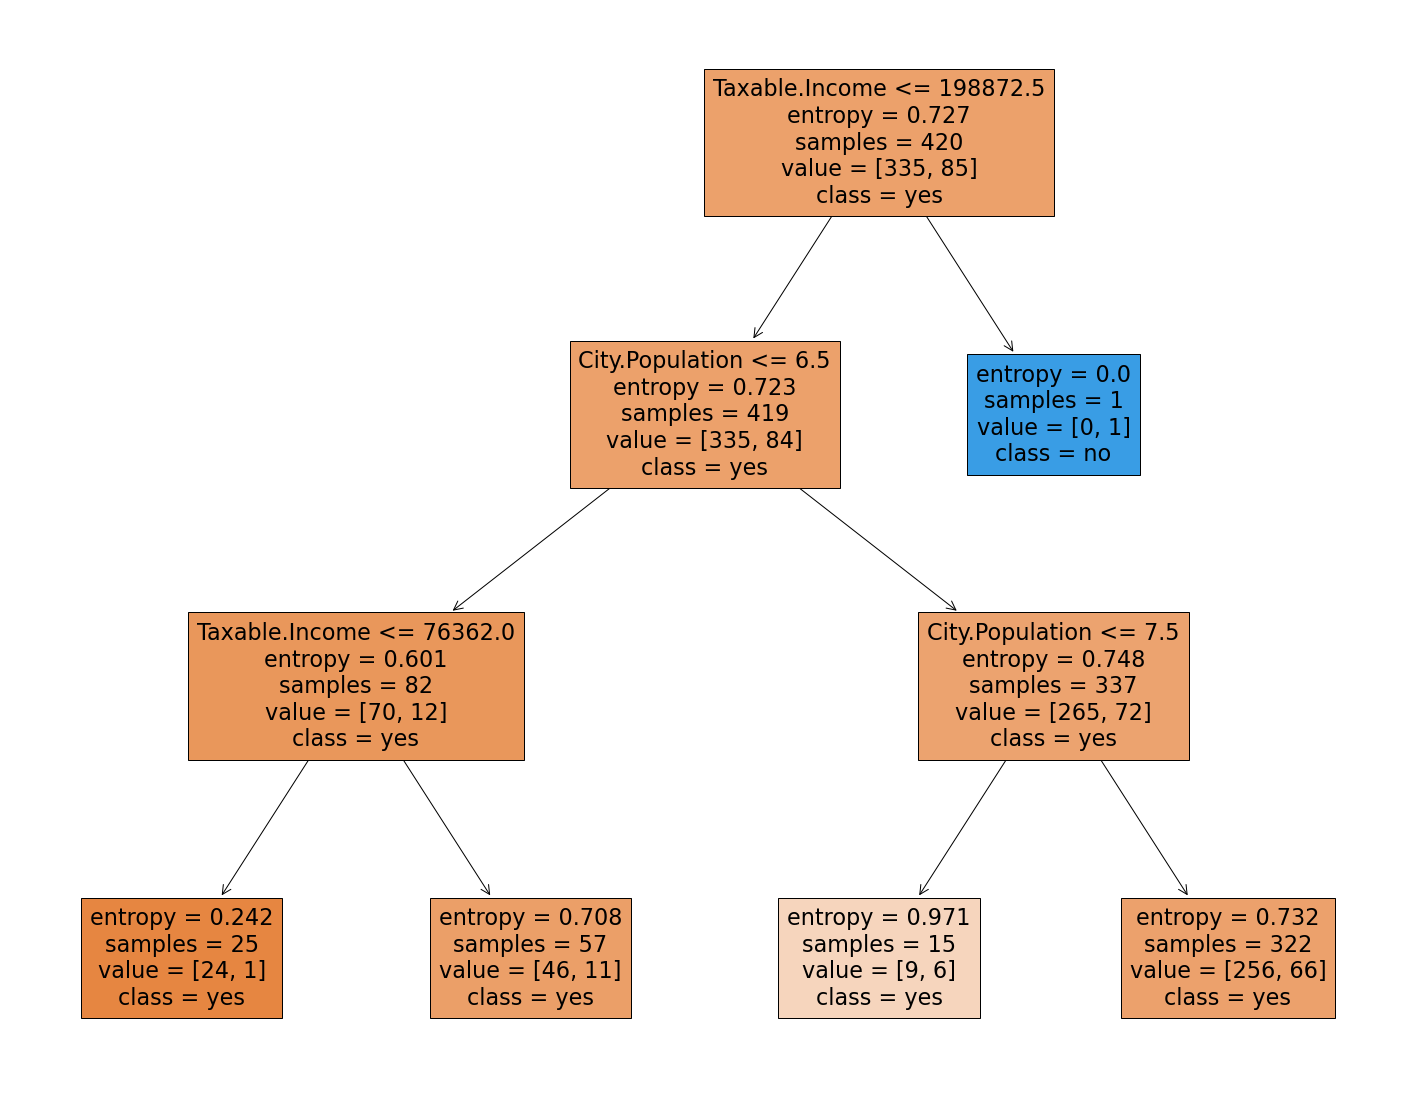

In [24]:
Fraud_feature=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
Fraud_class=['yes','no']
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model,
               feature_names = Fraud_feature, 
               class_names=Fraud_class,
               filled = True); 